<a href="https://colab.research.google.com/github/musashiCZX/keras/blob/master/mlp_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() ####Load the data.

In [ ]:
X_valid = X_train_full[:5000].astype('float32')
y_valid = y_train_full[:5000]
X_train = X_train_full[5000:].astype('float32')
y_train = y_train_full[5000:]    #####Split the valid data out.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  ###Build the structure of the model. Here we follow the model of Aurelien's book.
                              ###Two hidden layers with relu activation function.
                              ###Output layer with softmax activation.


Check the structure of the model.


In [ ]:
model.summary()

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

###We redesign the categories to a matrix with n row and m columns where n denotes the size of the train set and m denotes the number of classes.

In [ ]:
model.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
### In the compiling, we apply the RMSprop optimizer which is used in the example code. The loss function is cateforical_crossentropy.
### We also calculate the accuracy to trace the performance when we train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), batch_size=100)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.save('model_basic.h5')

Visulize the trend of the measures.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [ ]:
###########################The model template.
model_elu = keras.models.Sequential()
model_elu.add(keras.layers.Flatten(input_shape = [28,28]))
model_elu.add(keras.layers.BatchNormalization())
model_elu.add(keras.layers.Dense(300, activation='elu', kernel_initializer = 'he_normal'))
model_elu.add(keras.layers.BatchNormalization())
model_elu.add(keras.layers.Dense(100, activation='elu', kernel_initializer = 'he_uniform'))
model_elu.add(keras.layers.BatchNormalization())
model_elu.add(keras.layers.Dense(10, activation='softmax'))
model_elu.compile()

Next, we try to modify the activation function and apply new kernel initializer to improve the performance of our model.

In [ ]:
model_elu = keras.models.Sequential()
model_elu.add(keras.layers.Flatten(input_shape = [28,28]))
model_elu.add(keras.layers.Dense(300, activation='elu'))
model_elu.add(keras.layers.Dense(100, activation='elu'))
model_elu.add(keras.layers.Dense(10, activation='softmax'))
model_elu.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_elu.save('model_elu.h5')

In [ ]:
history_elu = model_elu.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), batch_size = 100)
score_elu = model_elu.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_elu[0])
print('Test accuracy:', score_elu[1])

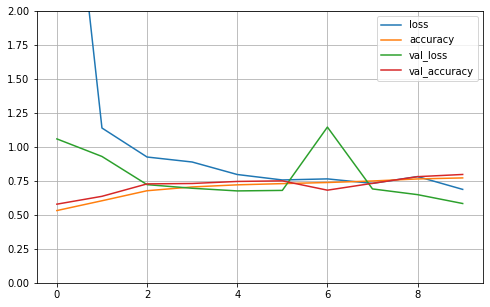

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_elu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

The performace is higher than the original model. \\
Then we apply leak-relu activation function to refit the model.


In [ ]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
model_leaky_relu = keras.models.Sequential()
model_leaky_relu.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu.add(keras.layers.Dense(300, activation=leaky_relu))
model_leaky_relu.add(keras.layers.Dense(100, activation=leaky_relu))
model_leaky_relu.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_leaky_relu.save('model_leaky_relu.h5')
history_leaky_relu = model_leaky_relu.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), batch_size=100)
score_leaky_relu = model_leaky_relu.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu[0])
print('Test accuracy:', score_leaky_relu[1])

Epoch 1/10
550/550 [==============================] - 5s 8ms/step - loss: 11.6635 - accuracy: 0.6956 - val_loss: 3.5932 - val_accuracy: 0.7558
Epoch 2/10
550/550 [==============================] - 4s 8ms/step - loss: 4.5989 - accuracy: 0.7463 - val_loss: 29.1416 - val_accuracy: 0.4088
Epoch 3/10
550/550 [==============================] - 4s 8ms/step - loss: 3.8297 - accuracy: 0.7707 - val_loss: 1.9998 - val_accuracy: 0.8106
Epoch 4/10
550/550 [==============================] - 4s 8ms/step - loss: 3.1726 - accuracy: 0.7807 - val_loss: 2.2206 - val_accuracy: 0.8162
Epoch 5/10
550/550 [==============================] - 4s 8ms/step - loss: 2.6077 - accuracy: 0.7910 - val_loss: 1.5143 - val_accuracy: 0.8074
Epoch 6/10
550/550 [==============================] - 4s 8ms/step - loss: 1.9003 - accuracy: 0.7995 - val_loss: 1.7380 - val_accuracy: 0.7980
Epoch 7/10
550/550 [==============================] - 4s 8ms/step - loss: 1.7679 - accuracy: 0.8056 - val_loss: 1.6263 - val_accuracy: 0.7976
Epoc

The Loss is bigger than the elu model.

However, the accuracy on the test set is higher than the elu. Additionally, the model performs equally on the test set and the train set.

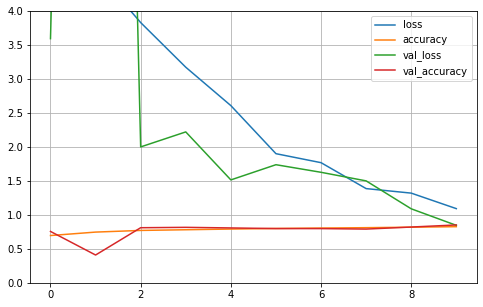

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_leaky_relu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()

We keep the leaky-relu activation function. Then add the batch normalization on the model.

In [ ]:
model_leaky_relu_BN = keras.models.Sequential()
model_leaky_relu_BN.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN.add(keras.layers.BatchNormalization())
model_leaky_relu_BN.add(keras.layers.Dense(300, activation=leaky_relu))
model_leaky_relu_BN.add(keras.layers.BatchNormalization())
model_leaky_relu_BN.add(keras.layers.Dense(100, activation=leaky_relu))
model_leaky_relu_BN.add(keras.layers.BatchNormalization())
model_leaky_relu_BN.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_leaky_relu_BN.save('model_leaky_relu_BN.h5')
history_leaky_relu_BN = model_leaky_relu_BN.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), batch_size=100)
score_leaky_relu_BN = model_leaky_relu_BN.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN[0])
print('Test accuracy:', score_leaky_relu_BN[1])

Epoch 1/10
550/550 [==============================] - 7s 12ms/step - loss: 0.4559 - accuracy: 0.8355 - val_loss: 0.3710 - val_accuracy: 0.8638
Epoch 2/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3499 - accuracy: 0.8718 - val_loss: 0.3566 - val_accuracy: 0.8780
Epoch 3/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3151 - accuracy: 0.8838 - val_loss: 0.3669 - val_accuracy: 0.8764
Epoch 4/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2930 - accuracy: 0.8915 - val_loss: 0.3711 - val_accuracy: 0.8864
Epoch 5/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2706 - accuracy: 0.9005 - val_loss: 0.3496 - val_accuracy: 0.8840
Epoch 6/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2565 - accuracy: 0.9055 - val_loss: 0.3498 - val_accuracy: 0.8944
Epoch 7/10
550/550 [==============================] - 6s 12ms/step - loss: 0.2438 - accuracy: 0.9089 - val_loss: 0.3528 - val_accuracy: 0.8842

The accuracy is improved for approximately 2%. Since the former accuracy is 95%. The increasing rate is approximately 40%.

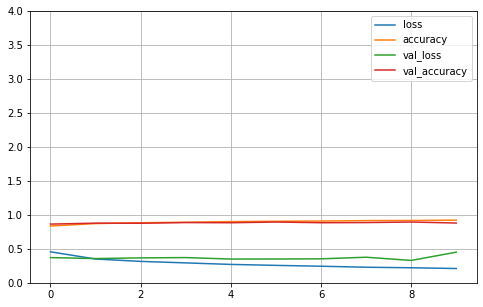

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_leaky_relu_BN.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()

Next, base on the leaky-relu model with batch normalization, we apply the 'he_normal' and 'he_uniform' initializer to the model.


In [ ]:
model_leaky_relu_BN_init = keras.models.Sequential()
model_leaky_relu_BN_init.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN_init.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init.add(keras.layers.Dense(300, activation=leaky_relu, kernel_initializer = 'he_normal'))
model_leaky_relu_BN_init.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer = 'he_uniform'))
model_leaky_relu_BN_init.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN_init.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_leaky_relu_BN_init = model_leaky_relu_BN_init.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid),batch_size=100)
score_leaky_relu_BN_init = model_leaky_relu_BN_init.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN_init[0])
print('Test accuracy:', score_leaky_relu_BN_init[1])

Epoch 1/10
550/550 [==============================] - 7s 12ms/step - loss: 0.4588 - accuracy: 0.8345 - val_loss: 0.3977 - val_accuracy: 0.8576
Epoch 2/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3509 - accuracy: 0.8721 - val_loss: 0.3548 - val_accuracy: 0.8772
Epoch 3/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3130 - accuracy: 0.8841 - val_loss: 0.3648 - val_accuracy: 0.8754
Epoch 4/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2883 - accuracy: 0.8928 - val_loss: 0.3542 - val_accuracy: 0.8808
Epoch 5/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2683 - accuracy: 0.8999 - val_loss: 0.3190 - val_accuracy: 0.8948
Epoch 6/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2533 - accuracy: 0.9058 - val_loss: 0.3377 - val_accuracy: 0.8908
Epoch 7/10
550/550 [==============================] - 6s 11ms/step - loss: 0.2379 - accuracy: 0.9119 - val_loss: 0.4022 - val_accuracy: 0.8876

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
txt = 'The accuracy is approximately the same as the model without setting initializer.'
pd.DataFrame(history_leaky_relu_BN_init.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.xlabel(xlabel = 'Echo')
plt.ylabel(ylabel = 'score')
plt.title('The performance of the model_leaky_relu_BN_init model')
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

The accuracy is approximately same as the model without initializer.

Then we add the dropout regularization on the model.

In [ ]:
model_leaky_relu_BN_init_drop = keras.models.Sequential()
model_leaky_relu_BN_init_drop.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN_init_drop.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_drop.add(keras.layers.Dense(300, activation=leaky_relu, kernel_initializer = 'he_normal'))
model_leaky_relu_BN_init_drop.add(Dropout(0.2))
model_leaky_relu_BN_init_drop.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_drop.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer = 'he_uniform'))
model_leaky_relu_BN_init_drop.add(Dropout(0.2))
model_leaky_relu_BN_init_drop.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_drop.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN_init_drop.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_leaky_relu_BN_init_drop = model_leaky_relu_BN_init_drop.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid),batch_size=100)
score_leaky_relu_BN_init_drop = model_leaky_relu_BN_init_drop.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN_init_drop[0])
print('Test accuracy:', score_leaky_relu_BN_init_drop[1])

Epoch 1/10
550/550 [==============================] - 8s 12ms/step - loss: 0.5141 - accuracy: 0.8177 - val_loss: 0.3768 - val_accuracy: 0.8676
Epoch 2/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3990 - accuracy: 0.8552 - val_loss: 0.3541 - val_accuracy: 0.8788
Epoch 3/10
550/550 [==============================] - 6s 12ms/step - loss: 0.3640 - accuracy: 0.8691 - val_loss: 0.3597 - val_accuracy: 0.8782
Epoch 4/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3427 - accuracy: 0.8762 - val_loss: 0.3554 - val_accuracy: 0.8790
Epoch 5/10
550/550 [==============================] - 6s 12ms/step - loss: 0.3266 - accuracy: 0.8813 - val_loss: 0.3863 - val_accuracy: 0.8770
Epoch 6/10
550/550 [==============================] - 6s 11ms/step - loss: 0.3179 - accuracy: 0.8840 - val_loss: 0.3376 - val_accuracy: 0.8894
Epoch 7/10
550/550 [==============================] - 7s 12ms/step - loss: 0.3045 - accuracy: 0.8880 - val_loss: 0.3549 - val_accuracy: 0.8908

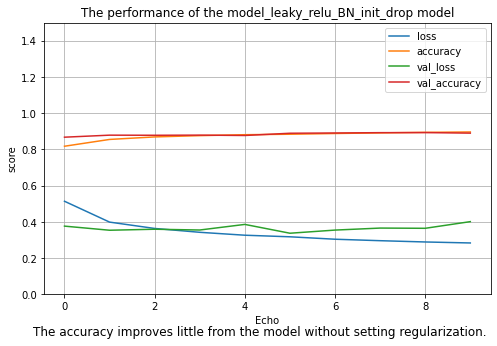

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
txt = 'The accuracy improves little from the model without setting regularization.'
pd.DataFrame(history_leaky_relu_BN_init_drop.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.xlabel(xlabel = 'Echo')
plt.ylabel(ylabel = 'score')
plt.title('The performance of the model_leaky_relu_BN_init_drop model')
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Additionally, we also apply l1 and l2 regularization to the model.

The model with l1 regularization with parameter $\lambda = 0.01$

In [ ]:
model_leaky_relu_BN_init_l1 = keras.models.Sequential()
model_leaky_relu_BN_init_l1.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN_init_l1.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l1.add(keras.layers.Dense(300, activation=leaky_relu, kernel_initializer = 'he_normal', kernel_regularizer = keras.regularizers.l1(0.01)))
model_leaky_relu_BN_init_l1.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l1.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer = 'he_uniform', kernel_regularizer = keras.regularizers.l1(0.01)))
model_leaky_relu_BN_init_l1.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l1.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN_init_l1.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_leaky_relu_BN_init_l1 = model_leaky_relu_BN_init_l1.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid),batch_size=100)
score_leaky_relu_BN_init_l1 = model_leaky_relu_BN_init_l1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN_init_l1[0])
print('Test accuracy:', score_leaky_relu_BN_init_l1[1])

Epoch 1/10
550/550 [==============================] - 8s 12ms/step - loss: 11.0099 - accuracy: 0.7163 - val_loss: 2.5290 - val_accuracy: 0.7558
Epoch 2/10
550/550 [==============================] - 7s 12ms/step - loss: 2.4717 - accuracy: 0.7778 - val_loss: 2.1213 - val_accuracy: 0.8210
Epoch 3/10
550/550 [==============================] - 7s 12ms/step - loss: 2.2931 - accuracy: 0.7926 - val_loss: 2.4172 - val_accuracy: 0.7630
Epoch 4/10
550/550 [==============================] - 6s 12ms/step - loss: 2.1666 - accuracy: 0.8045 - val_loss: 2.0356 - val_accuracy: 0.8208
Epoch 5/10
550/550 [==============================] - 7s 12ms/step - loss: 2.0938 - accuracy: 0.8125 - val_loss: 2.0813 - val_accuracy: 0.7860
Epoch 6/10
550/550 [==============================] - 7s 12ms/step - loss: 2.0441 - accuracy: 0.8150 - val_loss: 2.0613 - val_accuracy: 0.8050
Epoch 7/10
550/550 [==============================] - 7s 12ms/step - loss: 2.0318 - accuracy: 0.8169 - val_loss: 1.8847 - val_accuracy: 0.826

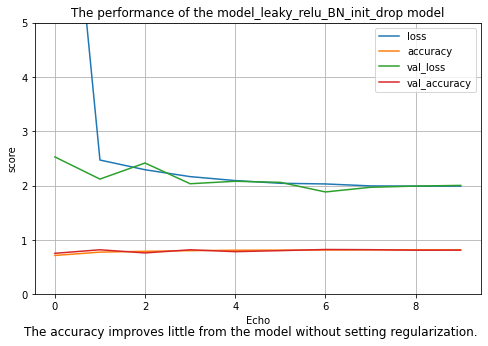

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
txt = 'The accuracy improves little from the model without setting regularization.'
pd.DataFrame(history_leaky_relu_BN_init_l1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5)
plt.xlabel(xlabel = 'Echo')
plt.ylabel(ylabel = 'score')
plt.title('The performance of the model_leaky_relu_BN_init_drop model')
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

The performance is much lower than the model without regularization. 

The model with l2 regularization with parameter $\lambda = 0.01$

In [ ]:
model_leaky_relu_BN_init_l2 = keras.models.Sequential()
model_leaky_relu_BN_init_l2.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN_init_l2.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l2.add(keras.layers.Dense(300, activation=leaky_relu, kernel_initializer = 'he_normal', kernel_regularizer = keras.regularizers.l2(0.01)))
model_leaky_relu_BN_init_l2.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l2.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer = 'he_uniform', kernel_regularizer = keras.regularizers.l2(0.01)))
model_leaky_relu_BN_init_l2.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l2.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN_init_l2.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_leaky_relu_BN_init_l2 = model_leaky_relu_BN_init_l2.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid),batch_size=100)
score_leaky_relu_BN_init_l2 = model_leaky_relu_BN_init_l2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN_init_l2[0])
print('Test accuracy:', score_leaky_relu_BN_init_l2[1])

Epoch 1/10
550/550 [==============================] - 8s 12ms/step - loss: 1.9116 - accuracy: 0.8112 - val_loss: 0.6433 - val_accuracy: 0.8348
Epoch 2/10
550/550 [==============================] - 6s 12ms/step - loss: 0.6196 - accuracy: 0.8285 - val_loss: 0.5216 - val_accuracy: 0.8612
Epoch 3/10
550/550 [==============================] - 6s 12ms/step - loss: 0.5766 - accuracy: 0.8369 - val_loss: 0.5192 - val_accuracy: 0.8580
Epoch 4/10
550/550 [==============================] - 7s 12ms/step - loss: 0.5491 - accuracy: 0.8418 - val_loss: 0.5353 - val_accuracy: 0.8474
Epoch 5/10
550/550 [==============================] - 7s 12ms/step - loss: 0.5180 - accuracy: 0.8507 - val_loss: 0.5367 - val_accuracy: 0.8454
Epoch 6/10
550/550 [==============================] - 7s 12ms/step - loss: 0.4934 - accuracy: 0.8563 - val_loss: 0.4631 - val_accuracy: 0.8662
Epoch 7/10
550/550 [==============================] - 7s 13ms/step - loss: 0.4812 - accuracy: 0.8577 - val_loss: 0.4463 - val_accuracy: 0.8664

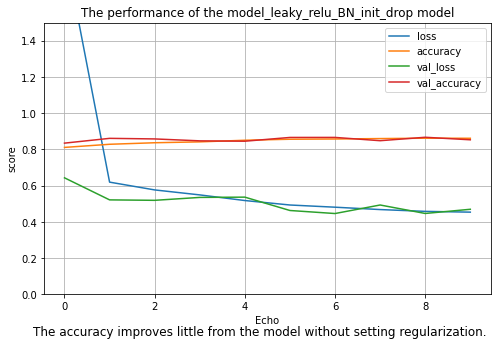

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
txt = 'The accuracy improves little from the model without setting regularization.'
pd.DataFrame(history_leaky_relu_BN_init_l2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.xlabel(xlabel = 'Echo')
plt.ylabel(ylabel = 'score')
plt.title('The performance of the model_leaky_relu_BN_init_drop model')
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

The l2 regularization performs better than the l1 regularization. Althought the performance is reasonable, the accuracy is still lower than the model without regularization. 

Since the accuracy of the l1 regularization model and the original model are significantly various, we need to tune the parameter of l1 regularization model to improve the performance. Hence we modify the parameter to 0.001 instead.

In [ ]:
model_leaky_relu_BN_init_l1_modify = keras.models.Sequential()
model_leaky_relu_BN_init_l1_modify.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN_init_l1_modify.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l1_modify.add(keras.layers.Dense(300, activation=leaky_relu, kernel_initializer = 'he_normal', kernel_regularizer = keras.regularizers.l1(0.001)))
model_leaky_relu_BN_init_l1_modify.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l1_modify.add(keras.layers.Dense(100, activation=leaky_relu, kernel_initializer = 'he_uniform', kernel_regularizer = keras.regularizers.l1(0.001)))
model_leaky_relu_BN_init_l1_modify.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_l1_modify.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN_init_l1_modify.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_leaky_relu_BN_init_l1_modify = model_leaky_relu_BN_init_l1_modify.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid),batch_size=100)
score_leaky_relu_BN_init_l1_modify = model_leaky_relu_BN_init_l1_modify.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN_init_l1_modify[0])
print('Test accuracy:', score_leaky_relu_BN_init_l1_modify[1])

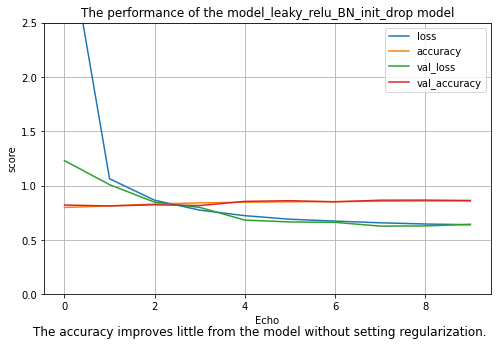

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
txt = 'The accuracy improves little from the model without setting regularization.'
pd.DataFrame(history_leaky_relu_BN_init_l1_modify.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,2.5)
plt.xlabel(xlabel = 'Echo')
plt.ylabel(ylabel = 'score')
plt.title('The performance of the model_leaky_relu_BN_init_drop model')
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

The accuracy reaches 95%, which is a much more reasonable performance.

The accuracy keeps solid when we add the regularization, initializer, and batch normalization. Therefore, we consider to change the structure of the model to improve the performance. Here we keep 2 hidden layers and modify the number of neurons of both hidden layers to 500.Then refit the model to assess the performance.


In [ ]:
model_leaky_relu_BN_init_drop_modify = keras.models.Sequential()
model_leaky_relu_BN_init_drop_modify.add(keras.layers.Flatten(input_shape = [28,28]))
model_leaky_relu_BN_init_drop_modify.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_drop_modify.add(keras.layers.Dense(500, activation=leaky_relu, kernel_initializer = 'he_normal'))
model_leaky_relu_BN_init_drop_modify.add(Dropout(0.2))
model_leaky_relu_BN_init_drop_modify.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_drop_modify.add(keras.layers.Dense(500, activation=leaky_relu, kernel_initializer = 'he_uniform'))
model_leaky_relu_BN_init_drop_modify.add(Dropout(0.2))
model_leaky_relu_BN_init_drop_modify.add(keras.layers.BatchNormalization())
model_leaky_relu_BN_init_drop_modify.add(keras.layers.Dense(10, activation='softmax'))
model_leaky_relu_BN_init_drop_modify.compile(optimizer = RMSprop(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_leaky_relu_BN_init_drop_modify = model_leaky_relu_BN_init_drop_modify.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid),batch_size=100)
score_leaky_relu_BN_init_drop_modify = model_leaky_relu_BN_init_drop_modify.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score_leaky_relu_BN_init_drop_modify[0])
print('Test accuracy:', score_leaky_relu_BN_init_drop_modify[1])

Epoch 1/10
550/550 [==============================] - 13s 21ms/step - loss: 0.5284 - accuracy: 0.8134 - val_loss: 0.3974 - val_accuracy: 0.8612
Epoch 2/10
550/550 [==============================] - 12s 21ms/step - loss: 0.3918 - accuracy: 0.8569 - val_loss: 0.3659 - val_accuracy: 0.8764
Epoch 3/10
550/550 [==============================] - 12s 21ms/step - loss: 0.3524 - accuracy: 0.8735 - val_loss: 0.3810 - val_accuracy: 0.8678
Epoch 4/10
550/550 [==============================] - 12s 21ms/step - loss: 0.3316 - accuracy: 0.8788 - val_loss: 0.3477 - val_accuracy: 0.8832
Epoch 5/10
550/550 [==============================] - 11s 21ms/step - loss: 0.3136 - accuracy: 0.8849 - val_loss: 0.3674 - val_accuracy: 0.8892
Epoch 6/10
550/550 [==============================] - 12s 22ms/step - loss: 0.2977 - accuracy: 0.8916 - val_loss: 0.3416 - val_accuracy: 0.8880
Epoch 7/10
550/550 [==============================] - 13s 24ms/step - loss: 0.2887 - accuracy: 0.8941 - val_loss: 0.3298 - val_accuracy:

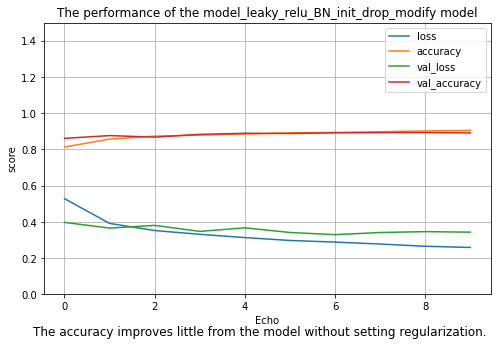

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
txt = 'The accuracy improves little from the model without setting regularization.'
pd.DataFrame(history_leaky_relu_BN_init_drop_modify.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.xlabel(xlabel = 'Echo')
plt.ylabel(ylabel = 'score')
plt.title('The performance of the model_leaky_relu_BN_init_drop_modify model')
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Optimization

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape = [28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape = [28,28]))
  options = {'kernel_initializer': 'he_normal',}
  for layer in range(n_hidden):
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(n_neurons, activation=leaky_relu, **options))
    model.add(Dropout(0.2))
    
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate), metrics=['accuracy'])
  return model

In [ ]:
keras_classify = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
param_distribs = {
  "n_hidden": [0, 1],
  "n_neurons": np.arange(300, 400, step = 20),
  "learning_rate": np.arange(5e-4, 2e-3, step = 5e-4),
}

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_classify, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=10,
  validation_data=(X_valid, y_valid))

Epoch 1/10
1146/1146 [==============================] - 8s 6ms/step - loss: 0.3526 - accuracy: 0.8945 - val_loss: 0.8520 - val_accuracy: 0.9370
Epoch 2/10
1146/1146 [==============================] - 7s 6ms/step - loss: 0.2103 - accuracy: 0.9387 - val_loss: 0.3928 - val_accuracy: 0.9502
Epoch 3/10
1146/1146 [==============================] - 7s 6ms/step - loss: 0.1723 - accuracy: 0.9495 - val_loss: 0.7142 - val_accuracy: 0.9518
Epoch 4/10
1146/1146 [==============================] - 7s 6ms/step - loss: 0.1445 - accuracy: 0.9576 - val_loss: 0.5859 - val_accuracy: 0.9550
Epoch 5/10
1146/1146 [==============================] - 7s 6ms/step - loss: 0.1295 - accuracy: 0.9622 - val_loss: 0.8582 - val_accuracy: 0.9602
Epoch 6/10
1146/1146 [==============================] - 7s 6ms/step - loss: 0.1140 - accuracy: 0.9652 - val_loss: 0.8866 - val_accuracy: 0.9594
Epoch 7/10
1146/1146 [==============================] - 7s 6ms/step - loss: 0.1117 - accuracy: 0.9666 - val_loss: 0.7608 - val_accuracy:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0ade80a1d0>,
                   param_distributions={'learning_rate': array([0.0005, 0.001 , 0.0015]),
                                        'n_hidden': [0, 1],
                                        'n_neurons': array([300, 320, 340, 360, 380])})

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'n_neurons': 360, 'n_hidden': 1, 'learning_rate': 0.0005}
0.9616727630297343


In [ ]:
model_best = rnd_search_cv.best_estimator_.model

In [ ]:
history_best = model_best.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=100. epochs=10)

SyntaxError: ignored

In [ ]:
score_best = model_best.evaluate(X_test, y_test, verbose=0)
print('Test loss is:', score_best[0])
print("Test accuracy is:", score_best[1])

Test loss is: 1279.1053466796875
Test accuracy is: 0.14550000429153442
